In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)
import pprint

In [5]:
list_available_datasets(search='diabe')
diabetes = fetch_ucirepo(id=296)

--------------------------------------------------------------
The following datasets are available for search query "diabe":
--------------------------------------------------------------
Dataset Name                                     ID    
------------                                     --    
Diabetes 130-US Hospitals for Years 1999-2008    296   
Diabetic Retinopathy Debrecen                    329   
Early Stage Diabetes Risk Prediction             529   
CDC Diabetes Health Indicators                   891   



c:\Users\yu.araki\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [6]:
df_origin = diabetes.data.original
print(df_origin.shape)
df_origin.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
z_thresh = 3.5
outlier_summary = []
for c in [c for c in df_origin.columns if np.issubdtype(df_origin[c].dropna().infer_objects().dtype, np.number)]:
    s = pd.to_numeric(df_origin[c], errors='coerce').dropna()
    if s.empty:
        continue
    z = (s - s.mean()) / s.std(ddof=0)
    outlier_rate = (np.abs(z) > z_thresh).mean()
    outlier_summary.append((c, outlier_rate))

outlier_tbl = pd.DataFrame(outlier_summary, columns=['column', 'outlier_rate']).sort_values('outlier_rate', ascending=False)
display(outlier_tbl)

,column,outlier_rate
3,discharge_disposition_id,0.015654
9,number_outpatient,0.014317
11,number_inpatient,0.011831
10,number_emergency,0.009227
8,num_medications,0.008451
2,admission_type_id,0.003144
4,admission_source_id,0.001720
12,number_diagnoses,0.000540
6,num_lab_procedures,0.000108
1,patient_nbr,0.000000



=== number_inpatient average by Readmission ===
readmitted
<30    1.224003
>30    0.838993
NO     0.381963
Name: number_inpatient, dtype: float64

=== number_emergency average by Readmission ===
readmitted
<30    0.357313
>30    0.283669
NO     0.109216
Name: number_emergency, dtype: float64

=== number_diagnoses average by Readmission ===
readmitted
<30    7.692789
>30    7.646898
NO     7.221366
Name: number_diagnoses, dtype: float64

=== number_outpatient average by Readmission ===
readmitted
<30    0.436911
>30    0.496329
NO     0.273112
Name: number_outpatient, dtype: float64

=== num_medications average by Readmission ===
readmitted
<30    16.903143
>30    16.282768
NO     15.670367
Name: num_medications, dtype: float64

=== time_in_hospital average by Readmission ===
readmitted
<30    4.768249
>30    4.495541
NO     4.254429
Name: time_in_hospital, dtype: float64


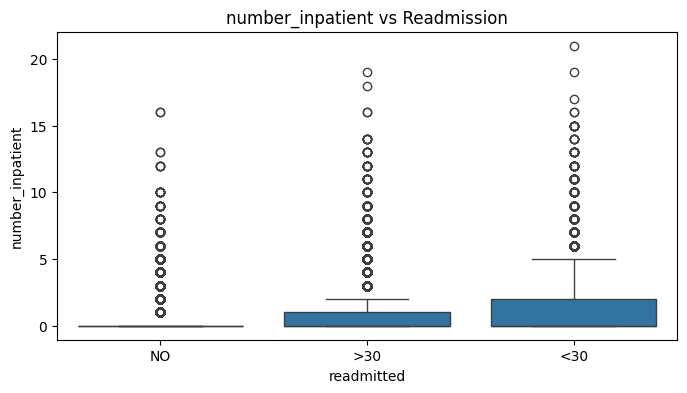

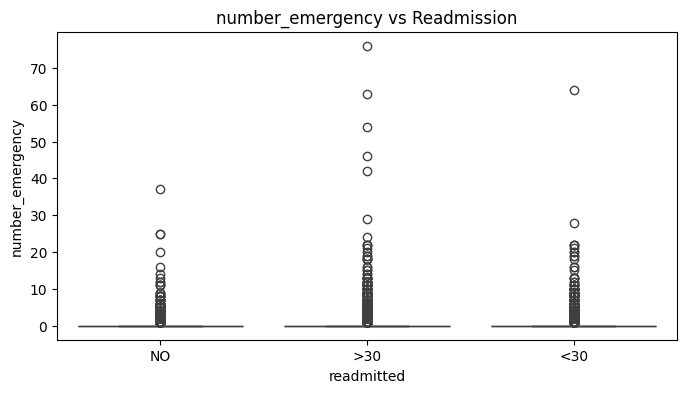

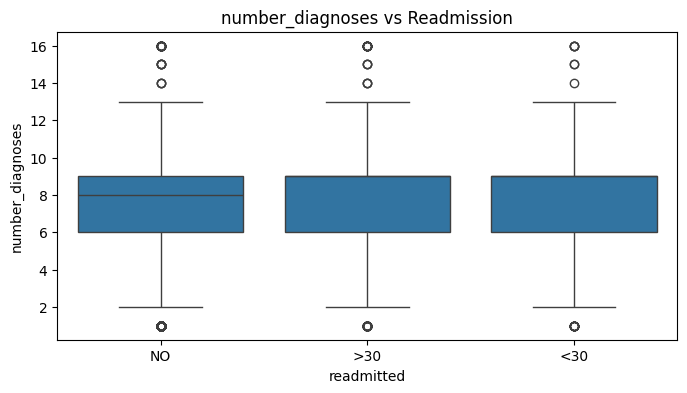

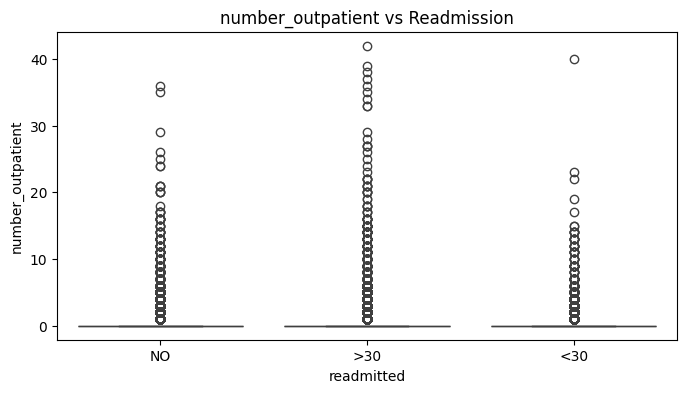

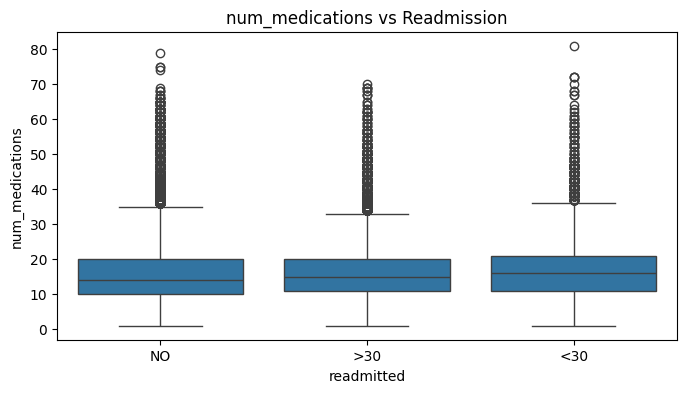

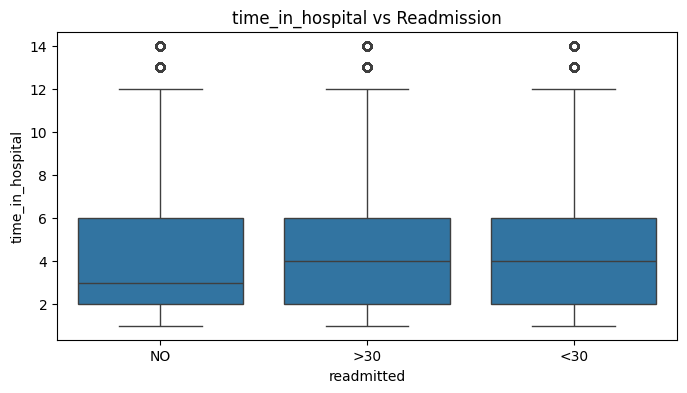


=== crosstab: readmited vs medical_specialty ===


medical_specialty,AllergyandImmunology,Anesthesiology,Anesthesiology-Pediatric,Cardiology,Cardiology-Pediatric,DCPTEAM,Dentistry,Dermatology,Emergency/Trauma,Endocrinology,Endocrinology-Metabolism,Family/GeneralPractice,Gastroenterology,Gynecology,Hematology,Hematology/Oncology,Hospitalist,InfectiousDiseases,InternalMedicine,Nephrology,Neurology,Neurophysiology,Obsterics&Gynecology-GynecologicOnco,Obstetrics,ObstetricsandGynecology,Oncology,Ophthalmology,Orthopedics,Orthopedics-Reconstructive,Osteopath,Otolaryngology,OutreachServices,Pathology,Pediatrics,Pediatrics-AllergyandImmunology,Pediatrics-CriticalCare,Pediatrics-EmergencyMedicine,Pediatrics-Endocrinology,Pediatrics-Hematology-Oncology,Pediatrics-InfectiousDiseases,Pediatrics-Neurology,Pediatrics-Pulmonology,Perinatology,PhysicalMedicineandRehabilitation,PhysicianNotFound,Podiatry,Proctology,Psychiatry,Psychiatry-Addictive,Psychiatry-Child/Adolescent,Psychology,Pulmonology,Radiologist,Radiology,Resident,Rheumatology,Speech,SportsMedicine,Surgeon,Surgery-Cardiovascular,Surgery-Cardiovascular/Thoracic,Surgery-Colon&Rectal,Surgery-General,Surgery-Maxillofacial,Surgery-Neuro,Surgery-Pediatric,Surgery-Plastic,Surgery-PlasticwithinHeadandNeck,Surgery-Thoracic,Surgery-Vascular,SurgicalSpecialty,Urology
readmitted,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<30,3,1,1,425,1,0,0,0,846,6,1,883,62,0,26,40,4,8,1646,248,12,0,2,1,32,66,2,151,92,3,2,1,1,16,0,3,0,1,1,0,0,2,0,60,2,10,0,104,0,1,8,96,103,8,1,3,0,0,4,6,43,1,342,1,32,0,7,0,11,74,2,68
>30,3,3,5,1853,4,1,3,1,3006,39,1,2663,214,10,24,64,19,12,4723,666,46,0,5,2,110,100,11,327,293,18,29,5,10,79,3,28,1,23,0,1,4,17,0,94,4,48,0,262,0,2,35,328,383,14,1,5,0,1,8,24,130,3,1046,2,76,2,10,1,30,200,9,185
NO,1,8,13,3074,2,5,1,0,3713,75,6,3894,288,48,32,103,34,17,8266,699,145,1,18,16,529,182,25,922,848,18,94,6,6,159,0,56,2,135,3,0,6,6,1,237,5,42,1,488,1,4,58,447,654,31,0,9,1,0,33,68,479,7,1711,8,360,6,24,0,68,259,22,432


chi2 = 1218.7671141774613, p = 1.8404284943510645e-170, dof = 142
Reject null hypothesis: There is a significant association between readmission and medical specialty.


In [8]:
for col in ['number_inpatient','number_emergency','number_diagnoses',
            'number_outpatient','num_medications','time_in_hospital']:
    print(f'\n=== {col} average by Readmission ===')
    print(df_origin.groupby('readmitted')[col].mean())
    
for col in ['number_inpatient','number_emergency','number_diagnoses',
            'number_outpatient','num_medications','time_in_hospital']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='readmitted', y=col, data=df_origin)
    plt.title(f'{col} vs Readmission')
    plt.show()

ct = pd.crosstab(df_origin['readmitted'], df_origin['medical_specialty'])

print('\n=== crosstab: readmited vs medical_specialty ===')
display(ct)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)
print(f'chi2 = {chi2}, p = {p}, dof = {dof}')
if p < 0.05:
    print ('Reject null hypothesis: There is a significant association between readmission and medical specialty.')
else:
    print ('Fail to reject null hypothesis: There is no significant association between readmission and medical specialty.')



=== crosstab: readmited vs medical_specialty


medical_specialty,AllergyandImmunology,Anesthesiology,Anesthesiology-Pediatric,Cardiology,Cardiology-Pediatric,DCPTEAM,Dentistry,Dermatology,Emergency/Trauma,Endocrinology
readmitted,,,,,,,,,,
<30,3,1,1,425,1,0,0,0,846,6
>30,3,3,5,1853,4,1,3,1,3006,39
NO,1,8,13,3074,2,5,1,0,3713,75



=== crosstab (ratio): readmited vs medical_specialty (at least 100 cases) ===


,count_total,count_<30,prop_<30
medical_specialty,,,
Hematology/Oncology,207,40,0.193237
Oncology,348,66,0.189655
Nephrology,1613,248,0.153751
PhysicalMedicineandRehabilitation,391,60,0.153453
Surgery-Vascular,533,74,0.138837
Psychiatry,854,104,0.121780
Family/GeneralPractice,7440,883,0.118683
InternalMedicine,14635,1646,0.112470
Emergency/Trauma,7565,846,0.111831


chi2 = 1218.7671141774613, p = 1.8404284943510645e-170, dof = 142
Reject null hypothesis: There is a significant association between readmission and medical specialty.


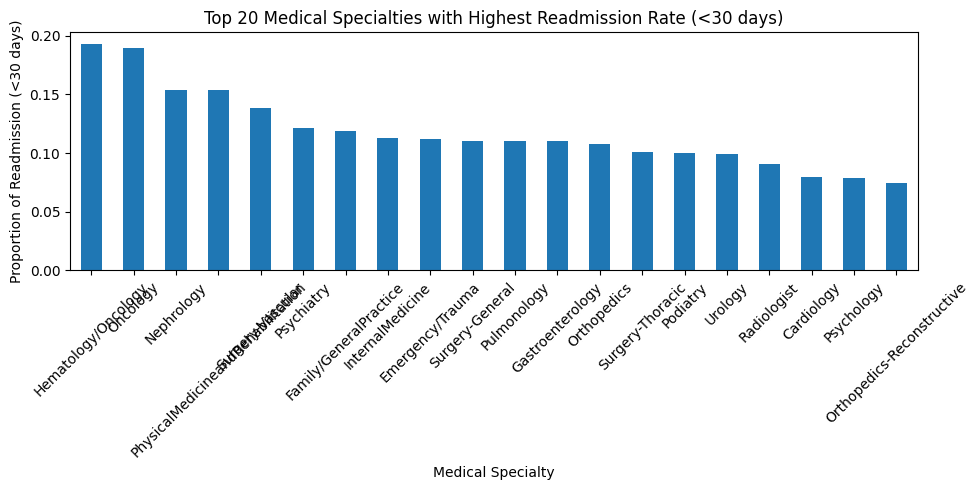

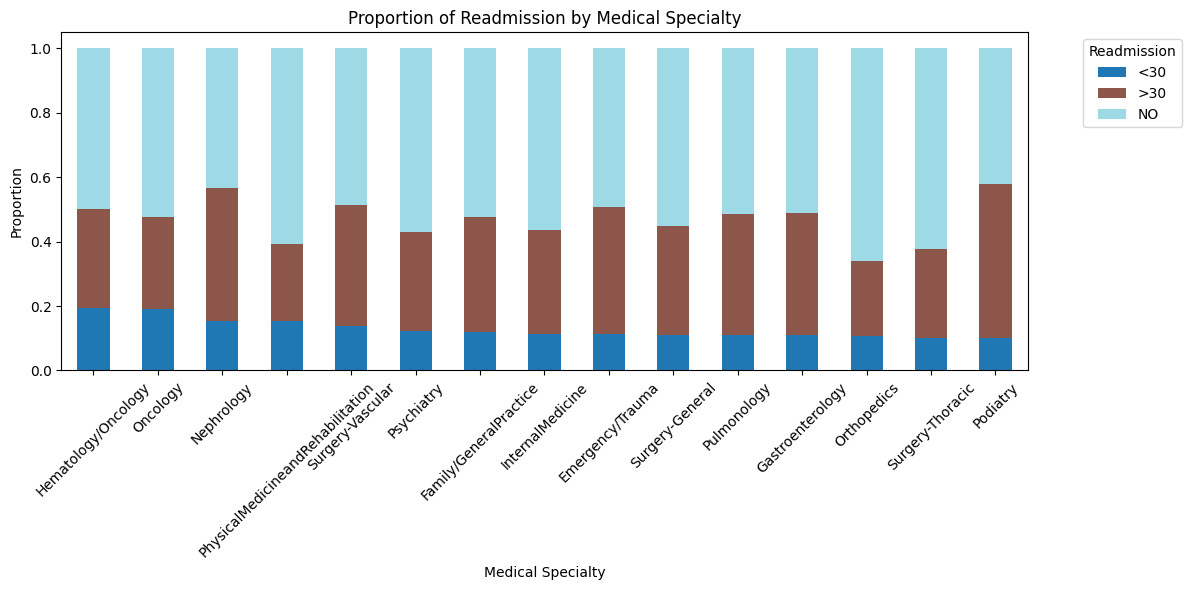

In [9]:
#Cross table for readmitted vs medical_specialty
ct = pd.crosstab(df_origin['readmitted'], df_origin['medical_specialty'])
print('\n=== crosstab: readmited vs medical_specialty')
display(ct.iloc[:,:10])

#Convert to percentage(column wise)
ct_ratio = ct.div(ct.sum(axis=0), axis=1)

#filtering the min-case
min_cases = 100
valid_specs = ct.sum(axis=0)[ct.sum(axis=0) >= min_cases]

#Display the ratio table for valid medical specialties only
readmit_lt30 = ct_ratio.loc['<30', valid_specs.index].sort_values(ascending=False)
top15_specs = readmit_lt30.head(15).index

print(f'\n=== crosstab (ratio): readmited vs medical_specialty (at least {min_cases} cases) ===')
top15_summary = pd.DataFrame({
    'count_total': ct[valid_specs.index].loc['NO'].add(ct[valid_specs.index].loc['>30'], fill_value=0).add(ct[valid_specs.index].loc['<30'], fill_value=0),
    'count_<30': ct[valid_specs.index].loc['<30'],
    'prop_<30': ct_ratio.loc['<30', valid_specs.index]
}).loc[top15_specs].sort_values(by='prop_<30', ascending=False)
display(top15_summary)

#Chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)
print(f'chi2 = {chi2}, p = {p}, dof = {dof}')
if p < 0.05:
    print ('Reject null hypothesis: There is a significant association between readmission and medical specialty.')
else:
    print ('Fail to reject null hypothesis: There is no significant association between readmission and medical specialty.')


#top 20 medical specialties with highest readmission rate (<30 days)
plt.figure(figsize=(10,5))
readmit_lt30.head(20).plot(kind='bar')
plt.title('Top 20 Medical Specialties with Highest Readmission Rate (<30 days)')
plt.xlabel('Medical Specialty')
plt.ylabel('Proportion of Readmission (<30 days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Stacked bar chart for readmission by medical specialty (top 15)
ct_med_ratio = ct.div(ct.sum(axis=0), axis=1)
ct_med_ratio_T = ct_med_ratio[top15_specs].T
ct_med_ratio_T.plot(kind='bar', stacked=True, figsize=(12,6), cmap='tab20')
plt.title('Proportion of Readmission by Medical Specialty')
plt.xlabel('Medical Specialty')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Readmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
#--- setting up---
READMITTED_COL = 'readmitted'
drug_cols = df_origin.columns[24:49]

for drug in drug_cols:
    print(f"\n==={drug}===")
    counts = df_origin[drug].value_counts().sort_index()
    print("counts")
    display(counts)

    readmitted_mask = df_origin[READMITTED_COL] != 'NO'
    count_readmit = df_origin.loc[readmitted_mask, drug].value_counts().sort_index()
    print("counts (readmitted)")
    display(count_readmit)

    fig, ax = plt.subplots(1,2, figsize=(12,4),sharey=True)

    counts.plot(kind = 'bar', ax=ax[0], title=f'All patients - {drug}')
    count_readmit.plot(kind = 'bar', ax=ax[1], title=f'Readmitted patients - {drug}')

    plt.suptitle(f'Drug: {drug}')
    plt.tight_layout()
    plt.show()




===insulin=== vs Readmission===


readmitted,<30,>30,NO
insulin,,,
Down,1698,4752,5768
No,4756,15949,26678
Steady,3433,10482,16934
Up,1470,4362,5484


chi2 = 516.695760681305, p = 2.1265863574275524e-108, dof = 6
Reject null hypothesis: There is a significant association between readmission and the drug.

=== crosstab (ratio): readmitted vs insulin ===


readmitted,<30,>30,NO
insulin,,,
Down,0.138975,0.388934,0.472090
No,0.100374,0.336598,0.563029
Steady,0.111284,0.339784,0.548932
Up,0.129905,0.385472,0.484624


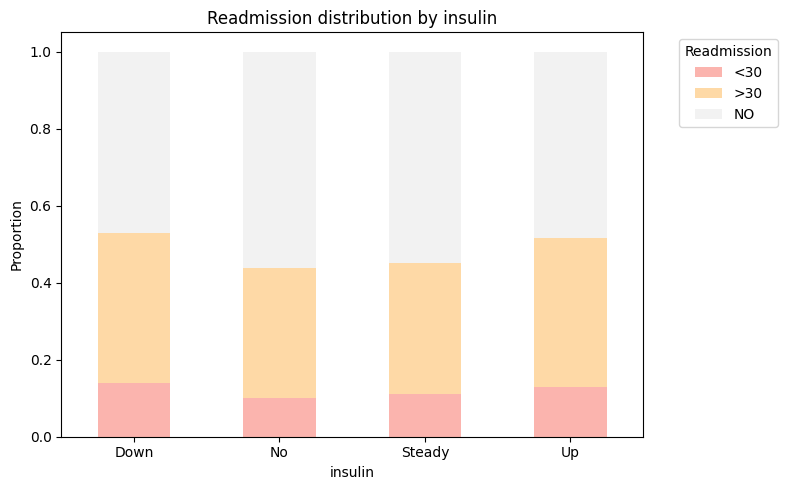


===diabetesMed=== vs Readmission===


readmitted,<30,>30,NO
diabetesMed,,,
No,2246,7227,13930
Yes,9111,28318,40934


chi2 = 386.5108843684742, p = 1.175514151065395e-84, dof = 2
Reject null hypothesis: There is a significant association between readmission and the drug.

=== crosstab (ratio): readmitted vs diabetesMed ===


readmitted,<30,>30,NO
diabetesMed,,,
No,0.095971,0.308807,0.595223
Yes,0.116267,0.361370,0.522364


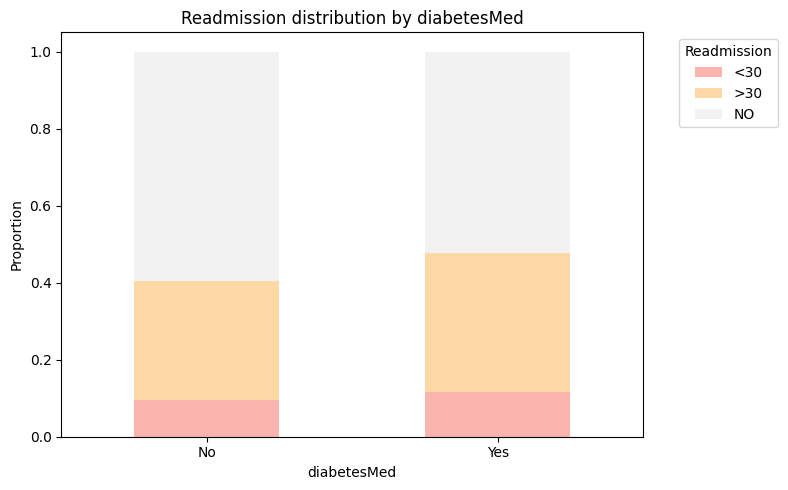

In [11]:
for drug in ['insulin', 'diabetesMed']:
    print(f"\n==={drug}=== vs Readmission===")

    ct = pd.crosstab(df_origin[drug], df_origin['readmitted'])
    display(ct)
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f'chi2 = {chi2}, p = {p}, dof = {dof}')
    if p < 0.05:
        print ('Reject null hypothesis: There is a significant association between readmission and the drug.')
    else:
        print ('Fail to reject null hypothesis: There is no significant association between readmission and the drug.') 

    ct_ratio = ct.div(ct.sum(axis=1), axis=0)
    print(f'\n=== crosstab (ratio): readmitted vs {drug} ===')
    display(ct_ratio)

    ct_ratio.plot(kind='bar', stacked=True, figsize=(8,5), cmap='Pastel1')
    plt.title(f'Readmission distribution by {drug}')
    plt.xlabel(drug)
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='Readmission', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
